# Import Libraries

In [16]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Mount the drive and read the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/NLP/Assignment-03

/content/drive/MyDrive/NLP/Assignment-03


In [5]:
df = pd.read_csv('amazonreviews.tsv', sep='\t')

In [6]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [7]:
df.shape

(10000, 2)

# Check if the dataset is unbalanced

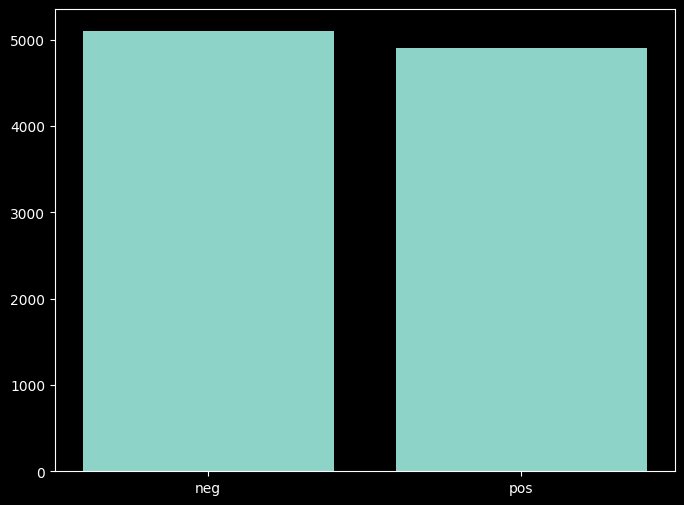

In [8]:
plt.figure(figsize = (8,6))
x, y = np.unique(df['label'], return_counts=True)
plt.bar(x, y, align='center')
plt.gca().set_xticks(x)
plt.show()

### Looks balance

In [9]:
df['label'].value_counts()

,count
label,
neg,5097
pos,4903


# Change labels into number

In [11]:
df['label'] = df['label'].map({'neg': 0, 'pos': 1})

In [12]:
df.head()

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


### Lets check for null values

In [13]:
df.isnull().any()

,0
label,False
review,False


### No null values in the dataset

# Extract features and labels from the dataset

In [14]:
features = df['review']
labels = df['label']

# Splt the data into training and testing

In [15]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Build a pipeline to perform word to number mapping and classification in a single step

In [18]:
from sklearn.pipeline import Pipeline

In [36]:
logistic_model = Pipeline([('tfidf', TfidfVectorizer(max_features = 4000)),('classifier', LogisticRegression(max_iter = 500)),])
knn_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=4000)),
    ('classifier', KNeighborsClassifier(n_neighbors=5)),  # Using KNN
])

### Fitting both models

In [37]:
logistic_model.fit(train_data, train_labels)
logistic_y_pred = logistic_model.predict(test_data)

knn_model.fit(train_data, train_labels)
knn_y_pred = knn_model.predict(test_data)

# Create Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

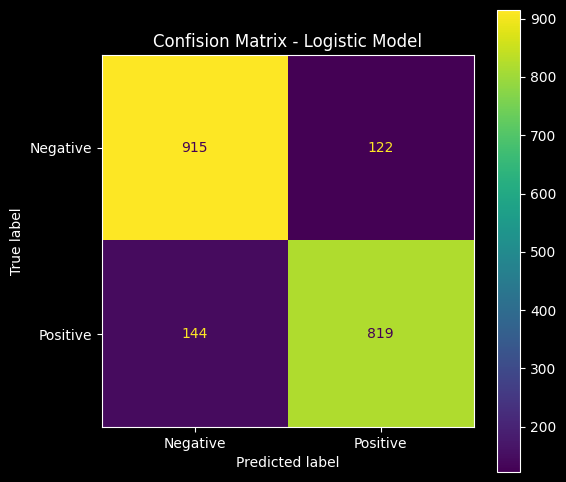

In [39]:
cm = confusion_matrix(test_labels,logistic_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['Negative','Positive'])
disp.plot(xticks_rotation=0)
fig = disp.ax_.get_figure()
fig.set_figwidth(6)
fig.set_figheight(6)
disp.ax_.set_title("Confision Matrix - Logistic Model")
plt.show()

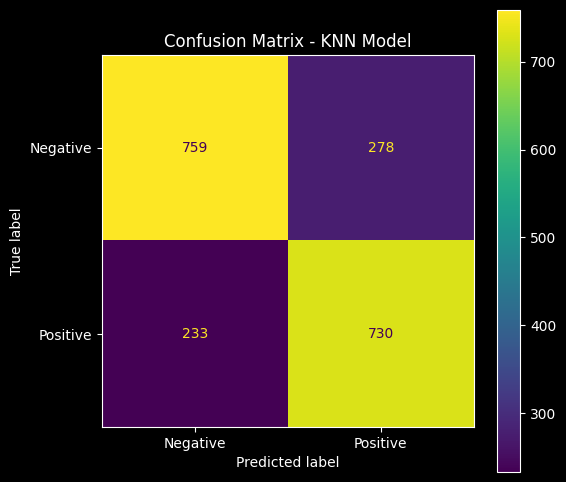

In [40]:
cm = confusion_matrix(test_labels,knn_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['Negative','Positive'])
disp.plot(xticks_rotation=0)
fig = disp.ax_.get_figure()
fig.set_figwidth(6)
fig.set_figheight(6)
disp.ax_.set_title("Confusion Matrix - KNN Model")
plt.show()

# Calculate Accuracy, Precision, Recall and F1_Score

In [44]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

In [45]:
print("---------- Logistic Model ----------")
print("Accuracy : %2.2f" % (accuracy_score(test_labels, logistic_y_pred, normalize=True)))
print("Precision : %2.2f" % (precision_score(test_labels, logistic_y_pred, average = 'macro')))
print("Recall : %2.2f" % (recall_score(test_labels, logistic_y_pred, average = 'macro')))
print("F1_Score : %2.2f" % (f1_score(test_labels, logistic_y_pred, average = 'macro')))
print("---------- KNN Model ----------")
print("Accuracy : %2.2f" % (accuracy_score(test_labels, knn_y_pred, normalize=True)))
print("Precision : %2.2f" % (precision_score(test_labels, knn_y_pred, average = 'macro')))
print("Recall : %2.2f" % (recall_score(test_labels, knn_y_pred, average = 'macro')))
print("F1_Score : %2.2f" % (f1_score(test_labels, knn_y_pred, average = 'macro')))

---------- Logistic Model ----------
Accuracy : 0.87
Precision : 0.87
Recall : 0.87
F1_Score : 0.87
---------- KNN Model ----------
Accuracy : 0.74
Precision : 0.74
Recall : 0.74
F1_Score : 0.74


In [46]:
print("---------- Logistic Model ----------")
print(classification_report(test_labels, logistic_y_pred))
print("---------- Logistic Model ----------")
print(classification_report(test_labels, knn_y_pred))

---------- Logistic Model ----------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1037
           1       0.87      0.85      0.86       963

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

---------- Logistic Model ----------
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1037
           1       0.72      0.76      0.74       963

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.75      0.74      0.74      2000



# Check the models performance

In [47]:
review = "bad service"

In [51]:
print('Logistic prediction: ', logistic_model.predict([review])[0])
print('Knn prediction: ', knn_model.predict([review])[0])

Logistic prediction:  0
Knn prediction:  0


In [52]:
review2 = "Awesome service"

In [53]:
print('Logistic prediction: ', logistic_model.predict([review2])[0])
print('Knn prediction: ', knn_model.predict([review2])[0])

Logistic prediction:  1
Knn prediction:  1


In [54]:
review3 = "I'm not sure"

In [55]:
print('Logistic prediction: ', logistic_model.predict([review3])[0])
print('Knn prediction: ', knn_model.predict([review3])[0])

Logistic prediction:  0
Knn prediction:  0


## Lets see what vader predicts

In [57]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [59]:
vader = SentimentIntensityAnalyzer()

vader.polarity_scores(review)


{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}

In [60]:
vader.polarity_scores(review2)

{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

In [61]:
vader.polarity_scores(review3)


{'neg': 0.495, 'neu': 0.505, 'pos': 0.0, 'compound': -0.2411}

# Conclusion

The dataset for this lab is balanced but only have 2 labels "neg" and "pos" (not consider neutral reviews), so based on the accuracy F1 scores, confusion matrix and other metrics **Logistic regresion model performs better than KNN for this dataset** even if in the 3 given examples the predictions are the same.